In [16]:
import cv2
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread(r"download.jpeg")
def show_cv_img(image):
    original_image = np.array(image)
    original_image = cv2.cvtColor(original_image, cv2.IMREAD_COLOR)
    plt.imshow(original_image)
    plt.axis('off')

In [17]:
# converting to grayscale manually 
img.shape

(225, 225, 3)

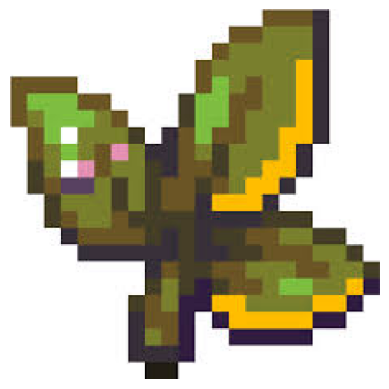

In [18]:
def zoom_out(img):
   h = img.shape[0]
   w = img.shape[1]
   new_image=np.zeros((h*2, w*2, img.shape[2]), dtype=img.dtype)
   for i in range(0,h) : 
      for j in range(0,w):
         new_image[2*i][2*j] = img[i][j]
         new_image[2*i+1][2*j] = img[i][j]
         new_image[2*i][2*j+1] = img[i][j]
         new_image[2*i+1][2*j+1] = img[i][j]
   return new_image

final=zoom_out(img)
show_cv_img(final)

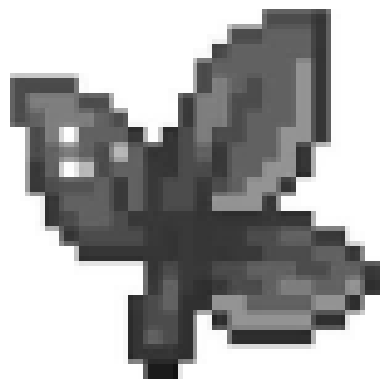

In [19]:
def zoom_in(img , factor):
    h, w = img.shape[:2]
    new_image = np.zeros((h//factor, w//factor, img.shape[2]), dtype=img.dtype)
    
    for i in range(h//factor):
        for j in range(w//factor):
          values = []
          for row in range(0,factor):
             for column in range(0,factor):
                values.append(img[i*factor + row][j*factor + column])
          new_image[i][j] = np.mean(values)
            
    return new_image

final=zoom_in(img , 3)
show_cv_img(final)

In [20]:
final.shape

(75, 75, 3)

C:\Users\sashr\AppData\Local\Temp\ipykernel_20316\3711936237.py:10: RuntimeWarning: overflow encountered in scalar add
  avg = (r + g + b) / 3


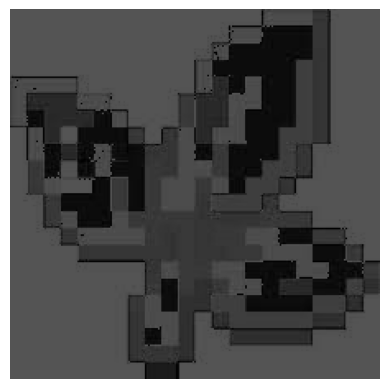

In [21]:
def gray(img):
   h = img.shape[0] 
   w = img.shape[1]
   np.zeros((h , w , 1)  , dtype=img.dtype)
   for i in range(h):
      for j in range(w):
         r = img[i][j][0]
         g = img[i][j][1]
         b = img[i][j][2]
         avg = (r + g + b) / 3
         img[i][j] = (avg, avg, avg)
   return img

show_cv_img(gray(img))   

In [22]:

def apply_filter(img, filter):
    h, w = img.shape[:2]
    new_image = np.zeros((h, w, img.shape[2]), dtype=img.dtype)
    
    for i in range(1, h-1):
        for j in range(1 ,w-1):
            values = []
            for row in range(max(0, i-1), min(h, i+2)):
                for column in range(max(0, j-1), min(w, j+2)):
                    values.append(img[row][column][0])
            new_image[i][j] = np.dot(values, filter.flatten())
    return new_image


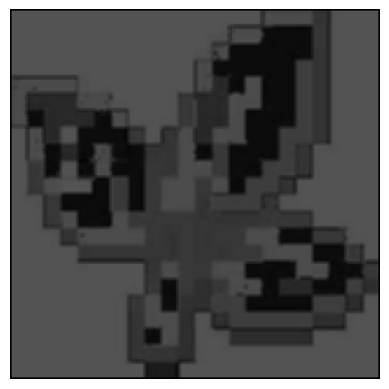

In [23]:
f = np.zeros((3,3))
f[:][:] = 1/9
show_cv_img(apply_filter(gray(img), f))


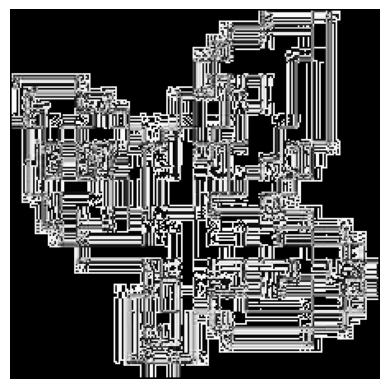

In [24]:
f = np.array([[1,1,1] , [1,-8,1] , [1,1,1]])
show_cv_img(apply_filter(gray(img), f))

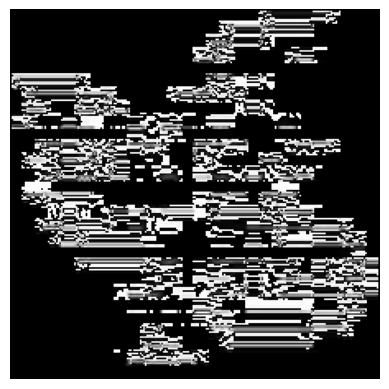

In [25]:
f = np.array([[-1,-2,-1] , [0,0,0] , [1,2,1]])
s1 = apply_filter(gray(img), f)
show_cv_img(s1)



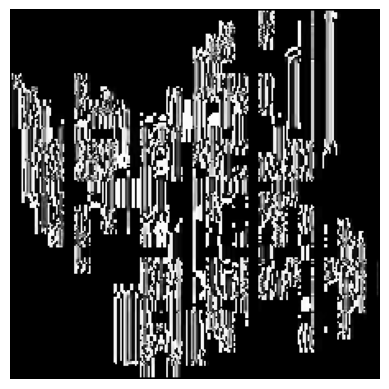

In [36]:
f = np.array([[-1,0,1] , [-2,0,2] , [-1,0,1]])
s2 = apply_filter(gray(img), f)
show_cv_img(s2)
s = s1+s2

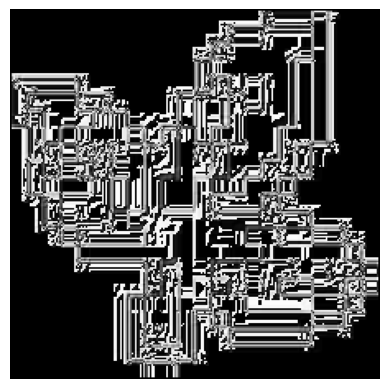

In [37]:
show_cv_img(s)

In [ ]:
# histogram equalization(dark and light)
#  power transform
# contrast stretching
# withot using OpenCV function

## Histogram equalizations on image 

## Histogram Equalization Formulas

Histogram equalization is a technique used to enhance the contrast of an image. Below are the key formulas used in this process:

1. **Histogram Calculation**:

   The histogram of an image is computed as:

   $$
   h(r_k) = \text{Number of pixels with intensity } r_k
   $$

   where \( r_k \) represents the intensity value of the k-th bin.

2. **Cumulative Distribution Function (CDF)**:

   The Cumulative Distribution Function is calculated as:

   $$
   \text{CDF}(r_k) = \sum_{i=0}^k h(r_i)
   $$

   Here, \(\text{CDF}(r_k)\) represents the cumulative number of pixels with intensities less than or equal to \( r_k \).

3. **Normalized CDF**:

   Normalize the CDF to the range [0, 1] by dividing by the total number of pixels \( N \):

   $$
   \text{PDF}(r_k) = \frac{\text{CDF}(r_k)}{N}
   $$

   where \( N \) is the total number of pixels in the image.

4. **Transformation Function**:

   The transformation function to map the original pixel values to new values is:

   $$
   s = \text{round}\left(255 \times \text{PDF}(r)\right)
   $$

   Here, \( s \) is the new pixel value, and \( r \) is the original pixel value. The result is scaled to the range [0, 255] for an 8-bit image.

5. **Equalized Image**:

   The pixel values in the equalized image are computed by applying the transformation function:

   $$
   \text{Equalized Image}(i, j) = s(\text{Original Image}(i, j))
   $$

   where \( (i, j) \) denotes the pixel location.

These formulas collectively describe the process of histogram equalization, where the pixel intensity values are redistributed to enhance the contrast of the image.


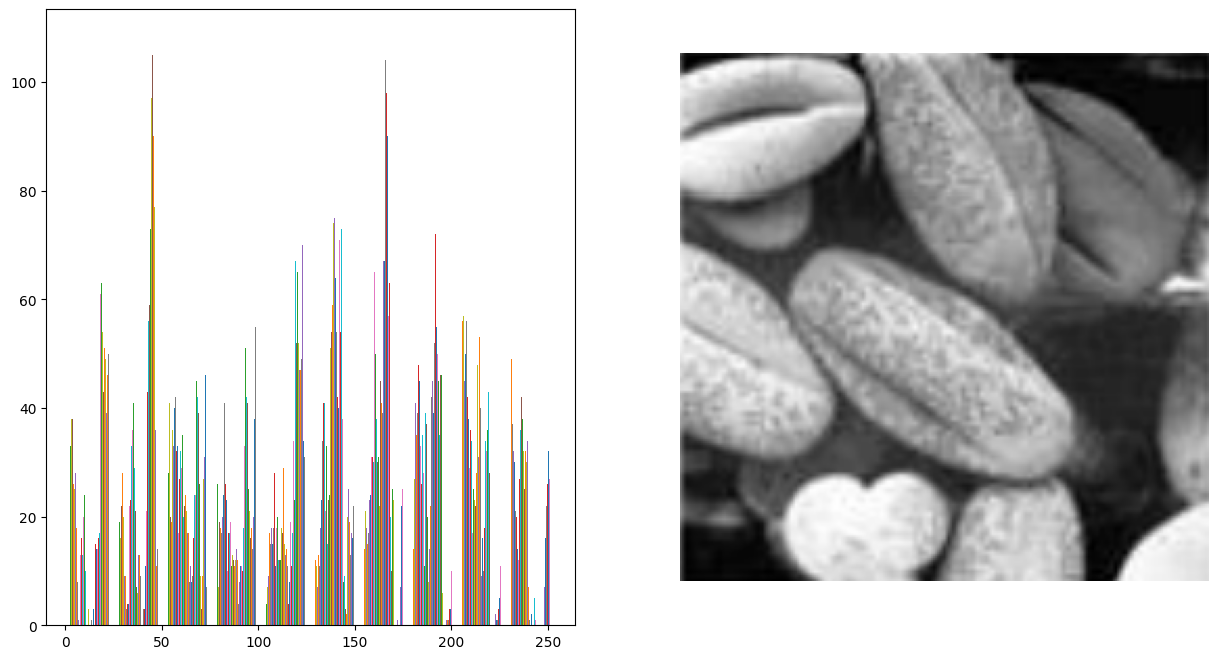

In [ ]:
plt.figure(figsize=(15, 8))
img = cv2.imread(r"C:\Users\sashr\Downloads\Screenshot 2024-08-28 202833.png")
img = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
img
plt.subplot(1 , 2 , 2)
show_cv_img(img)
plt.subplot(1 , 2 , 1)
plt.hist(img)
plt.show()


Histogram Equalization <br>
• Let rk , k belongs [0..L-1] be intensity levels and let p(rk) be its normalized histogram function.<br>
• The intensity transformation function for histogram equalization 

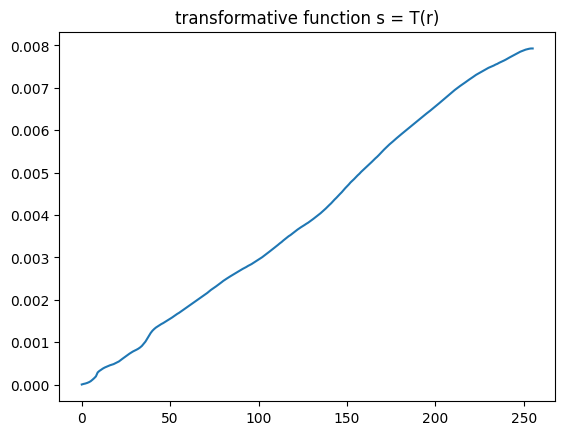

In [ ]:
hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])
pdf = hist.cumsum()/(np.sum(img.flatten()))
plt.plot(pdf)
plt.title("transformative function s = T(r)")
plt.show()


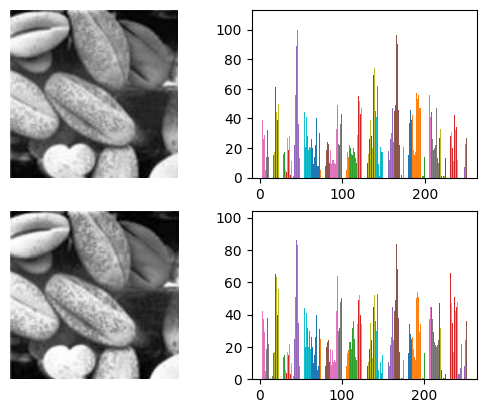

In [ ]:
def normalize(img):
    hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])

    pdf = hist.cumsum()
    pdf_normalized = pdf / pdf[-1]  

    map = {}
    for i in range(256):  
        map[i] = pdf_normalized[i]

    final = np.zeros_like(img, dtype=img.dtype)
    for i in range(len(img)):
        for j in range(len(img[0])):
            final[i, j] = int(255 * map[img[i, j]])  

    return final

final = normalize(img)
plt.subplot(2,2,1)
show_cv_img(img)
plt.subplot(2,2,2)
plt.hist(img)
plt.subplot(2,2,3)
show_cv_img(final)
plt.subplot(2,2,4)
plt.hist(final)
plt.show()

****************************************************************************************************

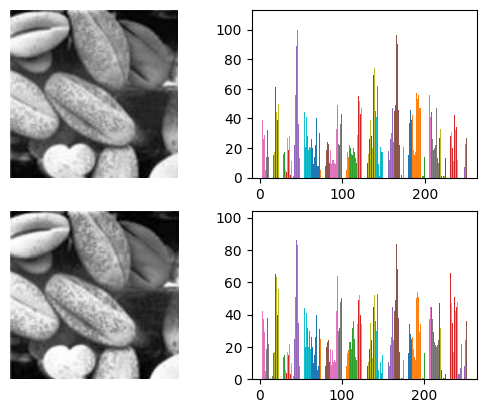

In [ ]:
final = normalize(img)
for i in range(1000):
   if i%10 == 0 : 
      print("*" , end = "")
   final = normalize(final)

plt.subplot(2,2,1)
show_cv_img(img)
plt.subplot(2,2,2)
plt.hist(img)
plt.subplot(2,2,3)
show_cv_img(final)
plt.subplot(2,2,4)
plt.hist(final)
plt.show()

In [ ]:
# comparing the standard deviations of both 

print("Standard deviation of original image: ", np.std(img))
print("Standard deviation of equalized image: ", np.std(final))

Standard deviation of original image:  69.13191423408439
Standard deviation of equalized image:  73.59021000552633


## power transform 
is a non-linear transformation technique used in Digital Image Processing (DIP) to enhance the contrast of an image. It is part of a broader family of intensity transformations that manipulate the pixel values to achieve a desired effect. The general form of the power-law transformation is:

$$ 𝑠=𝑐⋅𝑟^𝛾 $$

 

* Where:
- s is the output pixel value.
- r is the input pixel value (normalized to the range [0, 1] for an 8-bit image).
- c is a constant used for scaling (often set to 1).
- γ (gamma) is the power factor that controls the nature of the transformation.


- The power transform is often referred to as gamma correction, particularly when used to adjust the brightness and contrast of images.
When 
-  𝛾=1  the output image is identical to the input image.
When 
-  γ<1  the transformation enhances the brightness of the image, making it appear lighter.
When 
-  γ>1  the transformation reduces the brightness, making the image appear darker.
Applications:

* Image Enhancement: Power transforms are commonly used to improve the visibility of details in images. For example, dark regions of an image can be brightened 

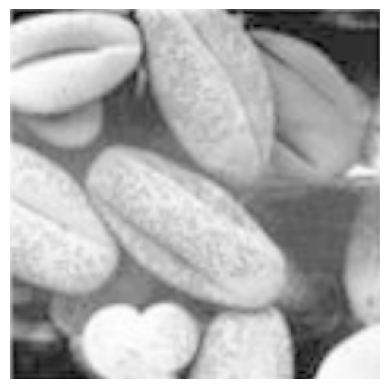

In [ ]:
gamma = 0.5  
light = np.power(img / 255.0, gamma)
light = np.uint8(light * 255)
show_cv_img(light)

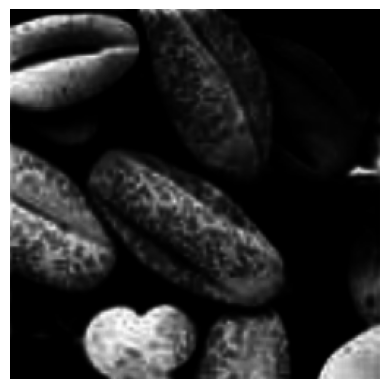

In [ ]:
gamma = 5
dark = np.power(img / 255.0, gamma)
dark = np.uint8(dark * 255)
show_cv_img(dark)

## contrast streching

$$ I_{\text{out}} = \frac{(I_{\text{in}} - I_{\text{min}})}{(I_{\text{max}} - I_{\text{min}})} \times (O_{\text{max}} - O_{\text{min}}) + O_{\text{min}}
$$

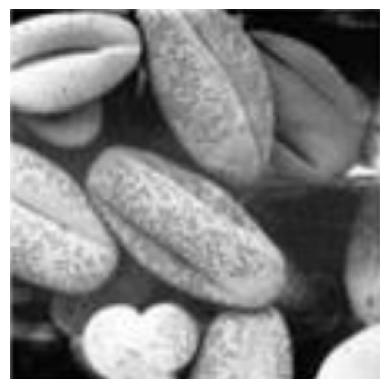

In [ ]:
def contrast_stretching(image, in_min, in_max, out_min, out_max):
    normalized_img = (image - in_min) / (in_max - in_min)
    stretched_img = normalized_img * (out_max - out_min) + out_min
    stretched_img = np.clip(stretched_img, 0, 255).astype(np.uint8)
    return stretched_img

image = img  
image_array = np.array(image)

in_min = np.min(image_array)
in_max = np.max(image_array)
out_min = 0
out_max = 255

stretched_image_array = contrast_stretching(image_array, in_min, in_max, out_min, out_max)
show_cv_img(stretched_image_array)

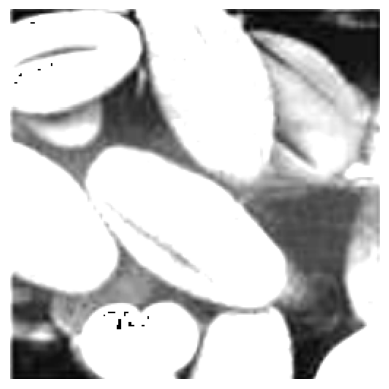

In [ ]:
in_min = np.max(image_array)
in_max = np.max(image_array) + (np.max(image_array) - np.min(image_array)) * 0.5
out_min = 0
out_max = 255
low_cont =  contrast_stretching(image_array, in_min, in_max, out_min, out_max)
show_cv_img(low_cont)

## Logarithamic transformation 

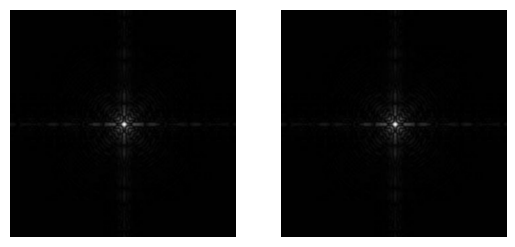

In [15]:
img = cv2.imread(r"assets\log_img.png")
image_array = np.array(img)
c = 255 / np.log1p(np.max(image_array))
log_img = c* np.log(1+img*2500)
log_img = img.astype(img.dtype)
plt.subplot(1,2,1)
show_cv_img(img)
plt.subplot(1,2,2)
show_cv_img(log_img)


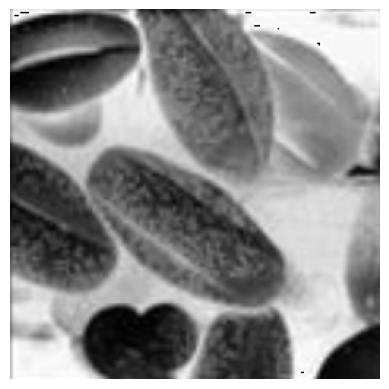

In [ ]:
neg_img = -img 
show_cv_img(neg_img)

# SUMMARY 

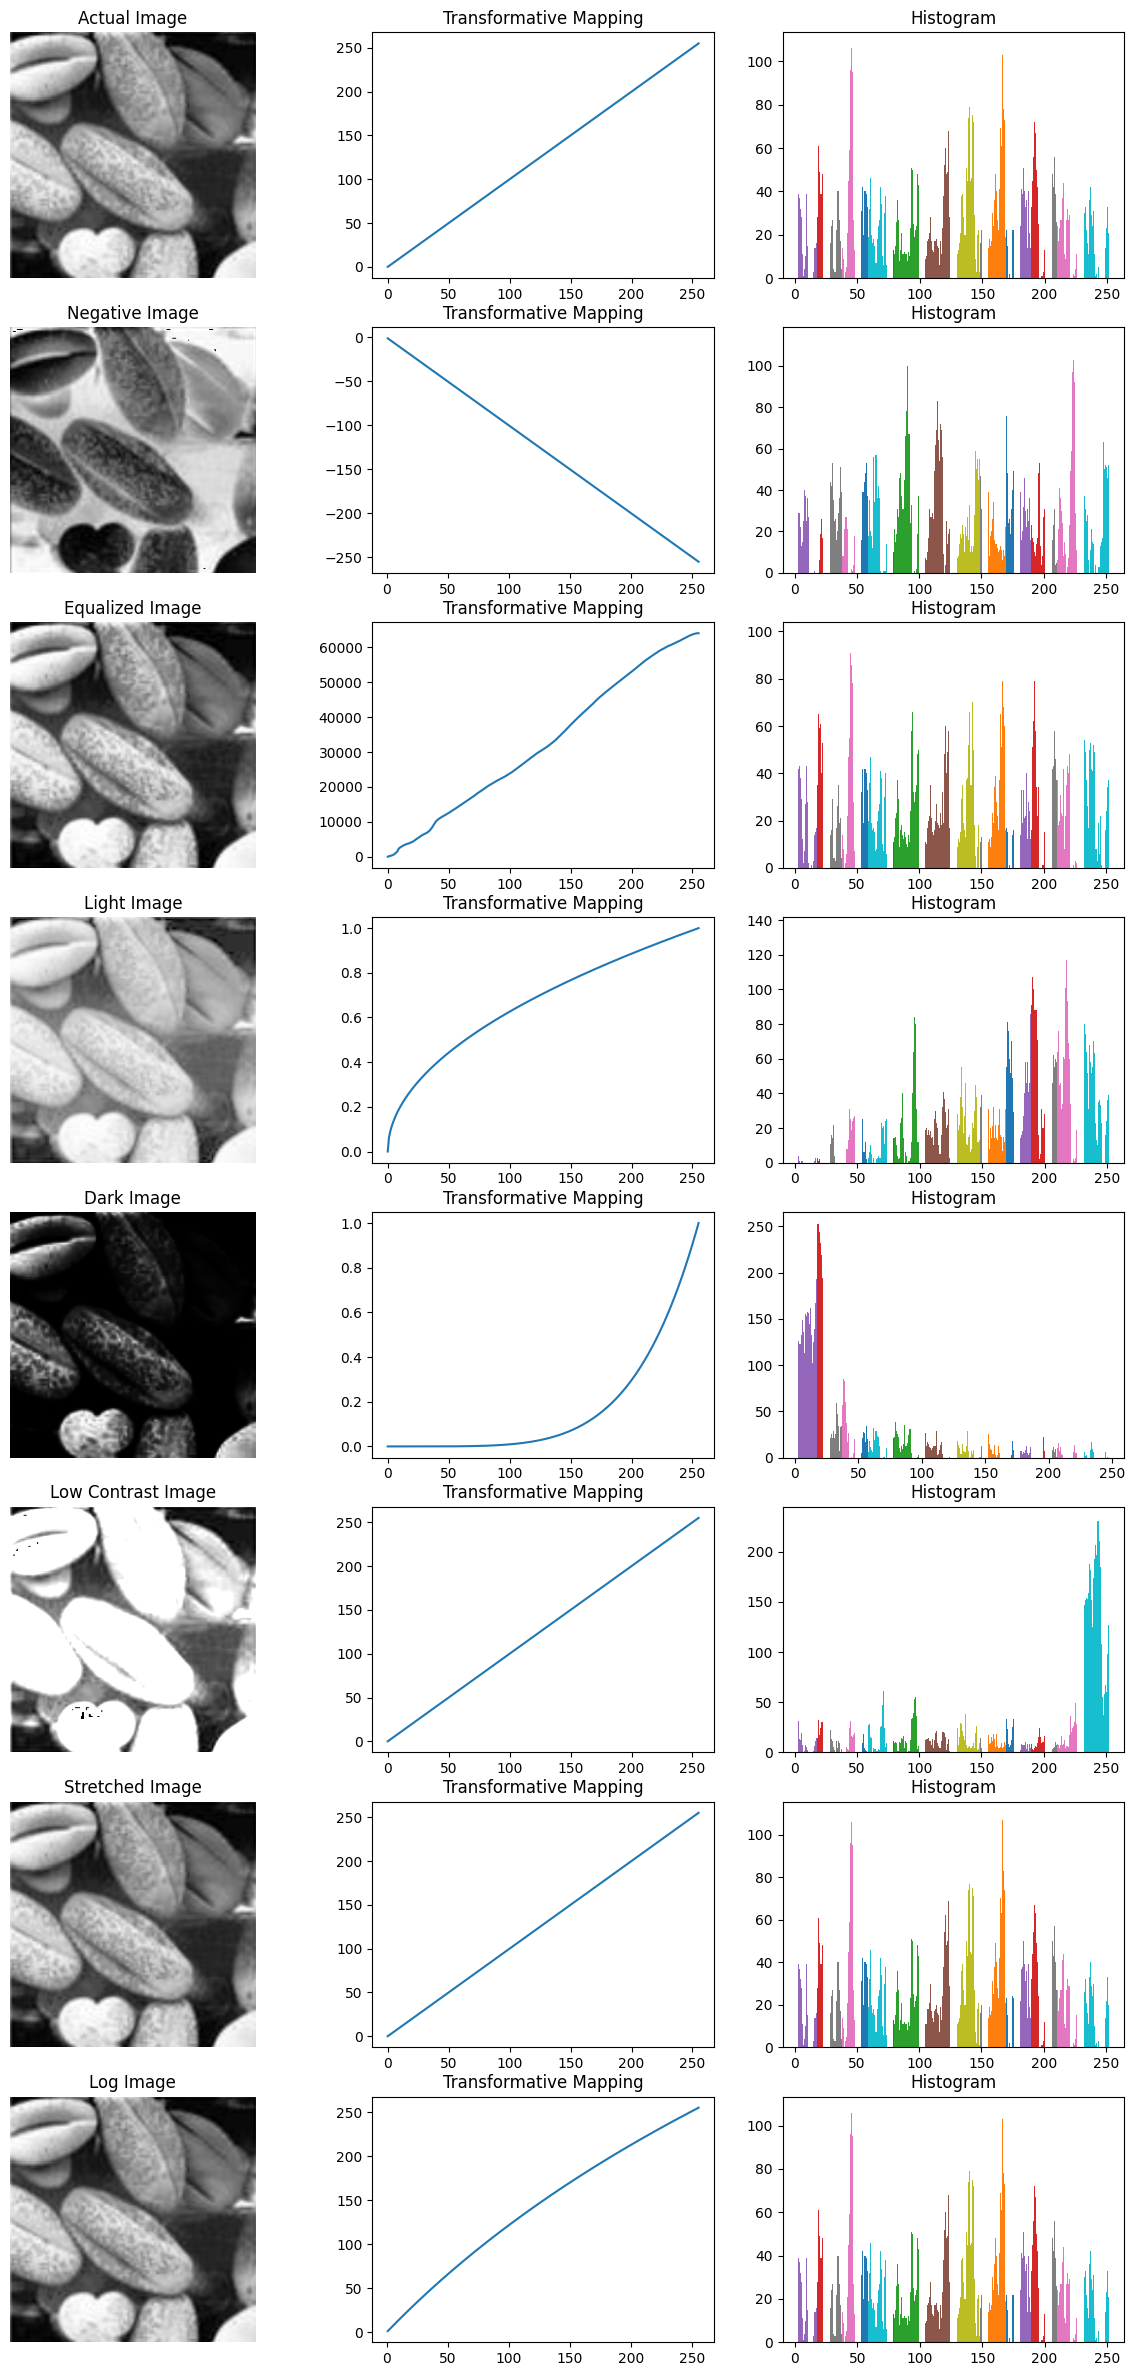

In [ ]:
plt.figure(figsize=(15, 30))

# Actual image
plt.subplot(8, 3, 1)
plt.title("Actual Image")
show_cv_img(img)
plt.subplot(8, 3, 2)
plt.title("Transformative Mapping")
x = y = range(0, 256)
plt.plot(x, y)

plt.subplot(8, 3, 3)
plt.title("Histogram")
plt.hist(img)

plt.subplot(8, 3, 4)
plt.title("Negative Image")
show_cv_img(neg_img)
plt.subplot(8, 3, 5) 
plt.title("Transformative Mapping")
x = np.arange(1, 256)
y = -x
plt.plot(x, y)

plt.subplot(8, 3, 6)
plt.title("Histogram")
plt.hist(neg_img)

plt.subplot(8, 3, 7)
plt.title("Equalized Image")
show_cv_img(final)
plt.subplot(8, 3, 8)
plt.title("Transformative Mapping")
plt.plot(pdf)

plt.subplot(8, 3, 9)
plt.title("Histogram")
plt.hist(final)

plt.subplot(8, 3, 10)
plt.title("Light Image")
show_cv_img(light)
plt.subplot(8, 3, 11)
plt.title("Transformative Mapping")
x = np.array(range(0, 256) , dtype = img.dtype)
y = np.power(x / 255.0, 0.5)
plt.plot(x, y)

plt.subplot(8, 3, 12)
plt.title("Histogram")
plt.hist(light)

plt.subplot(8, 3, 13)
plt.title("Dark Image")
show_cv_img(dark)
plt.subplot(8, 3, 14)
plt.title("Transformative Mapping")
x = np.array(range(0, 256) , dtype = img.dtype)
y = np.power(x / 255.0, 5)
plt.plot(x, y)

plt.subplot(8, 3, 15)
plt.title("Histogram")
plt.hist(dark)

plt.subplot(8, 3, 16)
plt.title("Low Contrast Image")
show_cv_img(low_cont)
plt.subplot(8, 3, 17) 
plt.title("Transformative Mapping")
x = np.array(range(0, 256) , dtype = img.dtype)
stretch_factor = 0.2 
y = (x - np.min(x)) / (np.max(x) - np.min(x)) * (255 - 0) + 0
plt.plot(x, y)

plt.subplot(8, 3, 18)
plt.title("Histogram")
plt.hist(low_cont)

plt.subplot(8, 3, 19)
plt.title("Stretched Image")
show_cv_img(stretched_image_array)
plt.subplot(8, 3, 20)  
plt.title("Transformative Mapping")
x = range(0, 256)
y = (x - np.min(x)) / (np.max(x) - np.min(x)) * (255 - 0) + 0
plt.plot(x, y)

plt.subplot(8, 3, 21)
plt.title("Histogram")
plt.hist(stretched_image_array)

plt.subplot(8, 3, 22)
plt.title("Log Image")
show_cv_img(log_img)
plt.subplot(8, 3, 23)  
plt.title("Transformative Mapping")
x = np.arange(1, 256)
y = np.log1p(x / 255.0) * 255.0 / np.log1p(1)
plt.plot(x, y)

plt.subplot(8, 3, 24)
plt.title("Histogram")
plt.hist(log_img)
plt.show()